# Predicting Diabetes Diagnosis Using Health Factors
Authors: Abby Howard, Arai Lubas, Ella Stasko

Check In One

# Introduction
We are interested in exploring what combination of the collected features best predicts whether an individual has diabetes. Given these inputs, we want to determine whether we can create a model to predict this accurately.

Our team will use the Healthcare Diabetes Dataset from Kaggle. Each instance represents an individual’s health data with features relevant to Diabetes outcomes. It was last updated in 2023, meaning the data is recent and relevant. The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). There are 2768 patients included in the data, with 10 features recorded. Each instance represents a unique individual with recorded features listed below:

1.	Id: Unique identifier for each data entry.
3.	Pregnancies: Number of times pregnant. (Includes people who cannot get pregnant).
4.	Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
5.	BloodPressure: Diastolic blood pressure (mm Hg).
6.	SkinThickness: Triceps skinfold thickness (mm). Indicator of body fat distribution.
7.	Insulin: 2-Hour serum insulin (mu U/ml).
8.	BMI: Body mass index (weight in kg / height in m^2).
9.	DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
10.	Age: Age in years.
11.	Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.
   
Features we are particularly interested in to predict whether the individual has diabetes are glucose, diabetes pedigree function, and insulin features. We are surprised by the skin thickness and intrigued to determine whether this has any predictive value. 


# Exploratory Data Analysis

In [1]:
#import needed modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)

# Summary Statistics

First we need to read in our data, and confirm there are no missing values in the data. 

In [13]:
# Read in the dataset and set the patient ID as the index
data = pd.read_csv('Healthcare-Diabetes.csv', index_col= 'Id')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31.0,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1


In [14]:
#check for na 
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

We noticed that there are multiple columns with an abundant amount of zeros for qualities that cannot equal zero (age, BMI, Insulin etc.) To understand how vast the missing values are for each column, we will quantify how many zeroes are in each column. 

In [51]:
# See how many zero counts for each column that shouldn't contain zeros
(data.iloc[: ,1:8] == 0).sum()

Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
dtype: int64

We can assume that the zeroes for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, and Age are missing values which we need to remove. Before deciding to drop any columns we decided to look at each variable individually.

In [53]:
# For data analysis, create DataFrames for each variable against outcome,
# removing zero values to assess trends via violin plots
        
dataframes = {} 

#generating individual dataframes for each variable containing the variable and outcome
for col in data:
    if col == 'Pregnancies':
        dataframes[col] = data.loc[:, (col, 'Outcome')]
    if col == 'Outcome':
        pass
    #remove zero value rows for all variables except pregancies and outcome
    else:
        dataframes[col] = data.loc[:, (col, 'Outcome')].query('`{}` != 0'.format(col))
        

Using each variables individual cleaned dataframes we can visualize their distributions to try to observe any differences within a variable between the two different outcomes

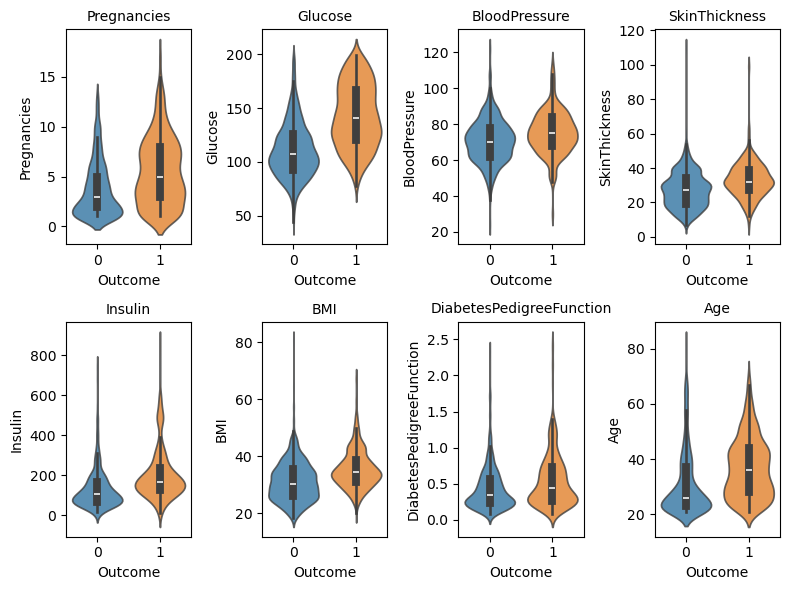

In [54]:
plt.figure(3, figsize = (8,6), clear = True)

subplot_num = 1

for key in dataframes:
    plt.subplot(2, 4, subplot_num)
    plt.title(f"{key}", size = 10)
    sns.violinplot(data = dataframes[key], y = key, x = 'Outcome', hue = 'Outcome', alpha = 0.8, legend = False)
    subplot_num +=1 
plt.tight_layout()

Pregnancies: It appears that patients with diabetes have a wider distribution of number of pregnancies. This becomes hard to interpret as the data includes patients unable to have children and doens't discriminate by sex making this variable not a likely target for predicting our outcome.

Glucose: Patients with diabetes have on average a higher blood glucose lebel than those without this is a possible target for prediction as the distributions appear distinct from one another.

Blood Pressure: Patients with diabetes have a slighly higher average diastolic blood pressure than those without, but overall the distributions appear similar.

Skin Thickeness: Patients with diabetes have a slighly higher average skin thickness than those without, but overall the distributions appear similar.

Insulin: Patients with diabetes have a higher average 2-hour serum insulin than those without

BMI: Patients with diametes have a higher average BMI

Diabetes Pedigree Function: these have very similar distributions

Next we cleaned the entire data set. Due to the high number of missing insulin values we have chosen to drop that column from our analysis. We will also drop skin thickness as there are a lot of missing values as well and doesn't necissarily look like a great predictor based on the distributions

In [69]:
# cleaning the entire dataframe to remove zero values rather than individual variables
cleaned_data = data.query('Glucose !=0 & BloodPressure !=0').copy()
cleaned_data.drop(['Insulin','SkinThickness'], axis = 1, inplace = True)
cleaned_data

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,,,,,,,
1,6,148,72,33.6,0.627,50,1
2,1,85,66,26.6,0.351,31,0
3,8,183,64,23.3,0.672,32,1
4,1,89,66,28.1,0.167,21,0
5,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
2764,2,75,64,29.7,0.370,33,0
2765,8,179,72,32.7,0.719,36,1
2766,6,85,78,31.2,0.382,42,0


Now we will take a look at the number of participants in the dataset.

In [70]:
#Count the number of participants in the cleaned sample
cleaned_data.shape

(2625, 7)

With 2625 participants left in the cleaned data, and 7 columns of health features, lets visualize some key aspects of our data set. 

Text(0.5, 1.0, 'Number of Pregnancies of Participants in Dataset')

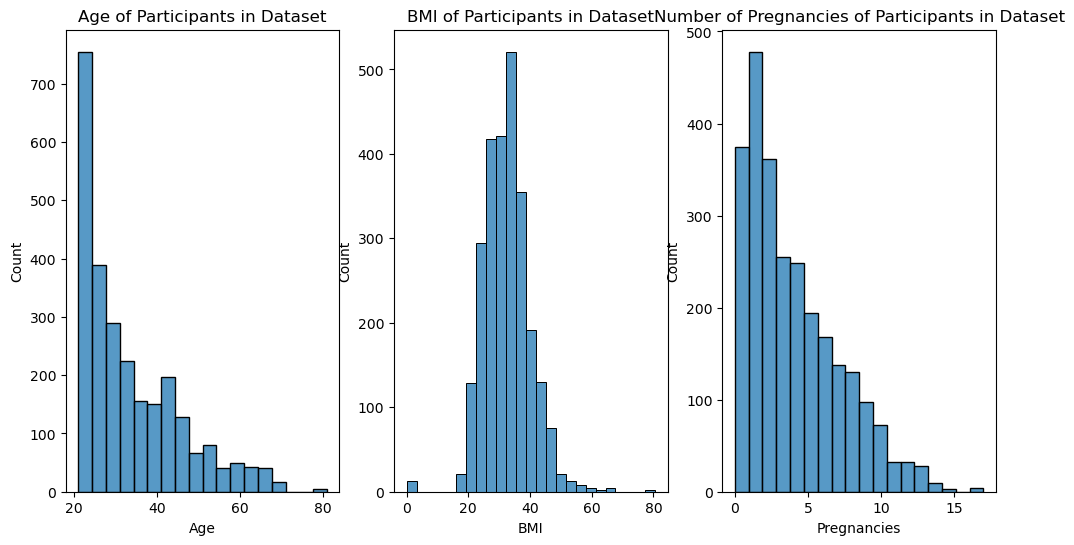

In [73]:
#Plot the Age Distribution of participants in a subplot
plt.figure(1, figsize = (12,6), clear = True)
plt.tight_layout()
plt.subplot(1,3,1)
sns.histplot(cleaned_data, 
             x = 'Age',
             bins = 18)
plt.title('Age of Participants in Dataset')

#plot the BMI distribution of Participants in a sub plot
plt.subplot(1,3,2)
sns.histplot(cleaned_data, 
             x = 'BMI',
             bins = 25)
plt.title('BMI of Participants in Dataset')

#plot the Distribution of the number of pregnancies in a subplot
plt.subplot(1,3,3)
sns.histplot(cleaned_data, 
              x = 'Pregnancies',
              bins = 18)
plt.title('Number of Pregnancies of Participants in Dataset')


Participants in the data set have a normal distribution of BMI, and a right skew of both age and number of pregnancies. It is important to note that the pregancies column includes men and those who cannot become pregnant, resulting in a very high number of zero pregnancies. 

This is relevant because diabetes is known to be correlated with pregnancy, but without the differentiation in sex of a patient, it wll be difficult to determine which individuals are women/those with a uterus who have not been pregnant, or a man/those who do not have a uterus. This may eliminate the potential to examine the impact of pregnancy on diabetes diagnosis

Next, let's examine known diagnoses of diabetes. 

Text(0.5, 1.0, '2-Hour Insulin Serum by Diabetes Diagnosis')

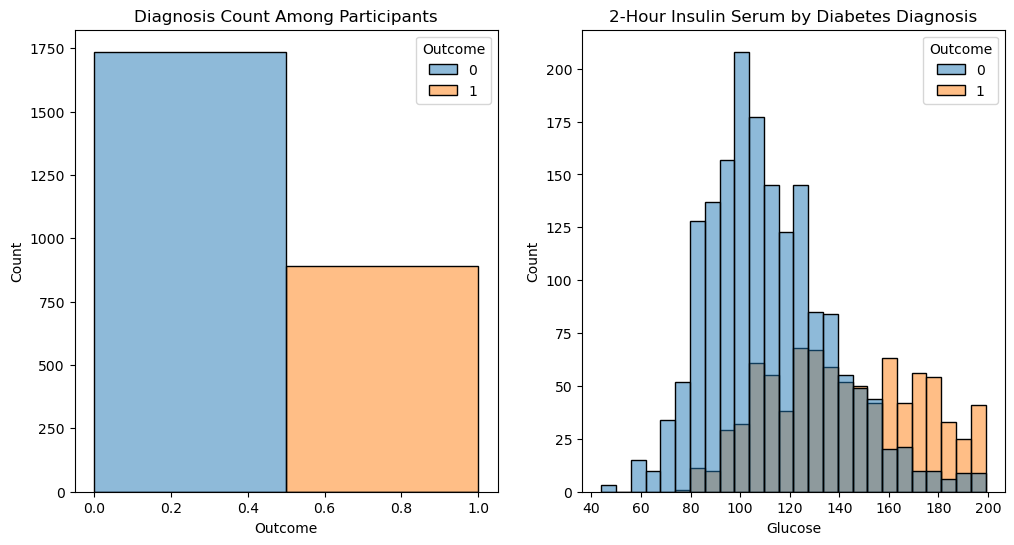

In [75]:
#Plot the number of participants with diabetes
plt.figure(2, figsize = (12,6), clear = True)
plt.subplot(1,2,1)
sns.histplot(cleaned_data, 
              x = 'Outcome',
              hue = 'Outcome',
              bins = 2)
plt.title('Diagnosis Count Among Participants')

#plot insulin levels separated and color coded by Diabestes Diagnosis
plt.subplot(1,2,2)
sns.histplot(cleaned_data,
             x = 'Glucose',
             hue = 'Outcome')
plt.title('2-Hour Insulin Serum by Diabetes Diagnosis')

Here we see that there are about half as many participants with diabetes in the data set. In addition, the glucose distributions for patients with diabetes and without diabetes both appear to be rather normal in their distribution. However, the diabetes distribution is shifted to the right with a higher average and seems to be flatter and wider than the non-diabetes distribution.

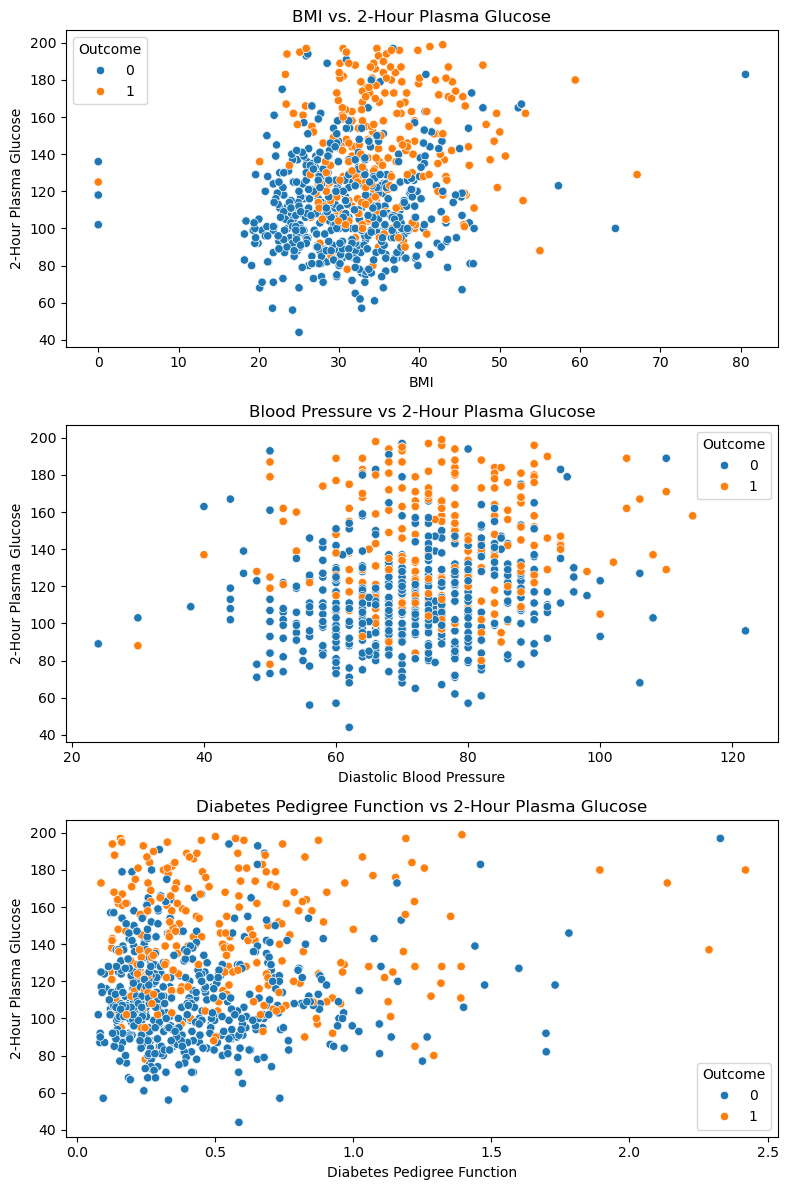

In [77]:

#Graph various variables vs. glucose
plt.figure(4, figsize = (8,12), clear = True)
plt.subplot(3,1, 1)

sns.scatterplot(x = 'BMI',
           y = 'Glucose',
           data = cleaned_data,
           hue = 'Outcome')

plt.title('BMI vs. 2-Hour Plasma Glucose')
plt.xlabel('BMI')
plt.ylabel('2-Hour Plasma Glucose')

plt.subplot(3,1, 2)
sns.scatterplot(x = 'BloodPressure',
           y = 'Glucose',
           data = cleaned_data,
           hue = 'Outcome')

plt.title('Blood Pressure vs 2-Hour Plasma Glucose')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('2-Hour Plasma Glucose')

plt.subplot(3,1, 3)
sns.scatterplot(x = 'DiabetesPedigreeFunction',
           y = 'Glucose',
           data = cleaned_data,
           hue = 'Outcome')

plt.title('Diabetes Pedigree Function vs 2-Hour Plasma Glucose')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('2-Hour Plasma Glucose')
plt.tight_layout()